<a href="https://colab.research.google.com/github/GoPackers/NU422/blob/master/Copy_of_Connelly_Terrence_MSDS422_Sec_56_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1:  Exploring and Visualizing Data
Terrence Connelly   MSDS422 Section 56

#### The MSPA Software Survey was collected in December 2016. Data from the survey were used to inform data science curriculum planning. 

Northwestern University surveyed its MSPA students in December 2016 with the goal of ascertaining students’ desired software skills, both in terms of personal preferences and employer and industry demands.   Additionally, with the same survey the university sought to gauge interest in potential new course offerings related to data science.   Studying the combined influence of the number of courses taken, the student’s expected graduation date and their preferences for software and interest in potential new course offerings could enable management to better assess the demand for new classes, as well as demand for applied software skills in both new and existing classes.  

Import Packages and code functions needed for analysis:

In [1]:
#@title
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
%matplotlib inline

import seaborn as sns  # pretty plotting, including heat map
plt.style.use('fivethirtyeight')

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.png', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)


from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
print("All Packages and a Correlation Chart function loaded.  WARNING - this was created in April, 2019 and warnings were supressed.")

All Packages and a Correlation Chart function loaded.  WARNING - this was created in April, 2019 and warnings were supressed.


### Ingest

In [0]:
#@title
valid_survey_input = pd.read_csv('https://raw.githubusercontent.com/GoPackers/NU422/master/mspa-survey-data.csv')

# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

In [3]:
valid_survey_input.head()

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5133300037,10,10,50,30,0,25,25,30,20,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
5132253300,20,0,40,40,0,0,0,40,40,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
5132096630,10,10,25,35,20,10,10,25,35,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
5131990362,20,0,0,70,10,20,0,0,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


### Data Exploration and Analysis

Looking at data we see number of respondents, and several datapoints for each respondent.  Below is also an example of the dataset analyzed.

In [4]:
#@title
# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)

# abbreviated printing of the first five rows of the data frame
pd.DataFrame.head(valid_survey_input) 


Contents of initial survey data ---------------

Number of Respondents = 207
Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5133300037,10,10,50,30,0,25,25,30,20,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
5132253300,20,0,40,40,0,0,0,40,40,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
5132096630,10,10,25,35,20,10,10,25,35,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
5131990362,20,0,0,70,10,20,0,0,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


##### Next simplify some of the data (labels were shortened - ie. "Personal_Python Preference" was converted to 'My_Python',and I plotted a  scatter to visually test one initial hypothesis that Python and R preferences are negatively correlated.

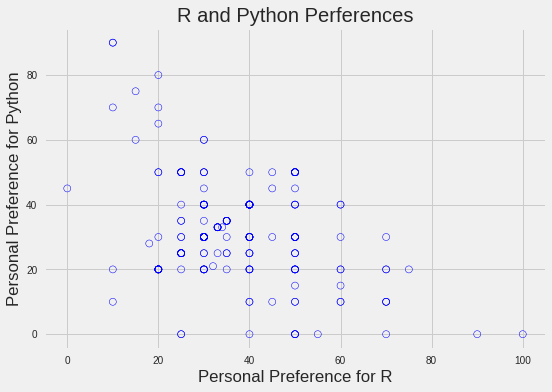

In [5]:
#@title


# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})
    

# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']
                     
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.png', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()

survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    

##### Below we see descriptive statistics for most questions surveyed.  

In [6]:
#@title

print("\n--Survey Descriptive Statistics---\n{}".format(survey_df.describe()))



--Survey Descriptive Statistics---
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std     10.812555    19.

##### Now we visually plot the data with histograms for all of the numeric data.  

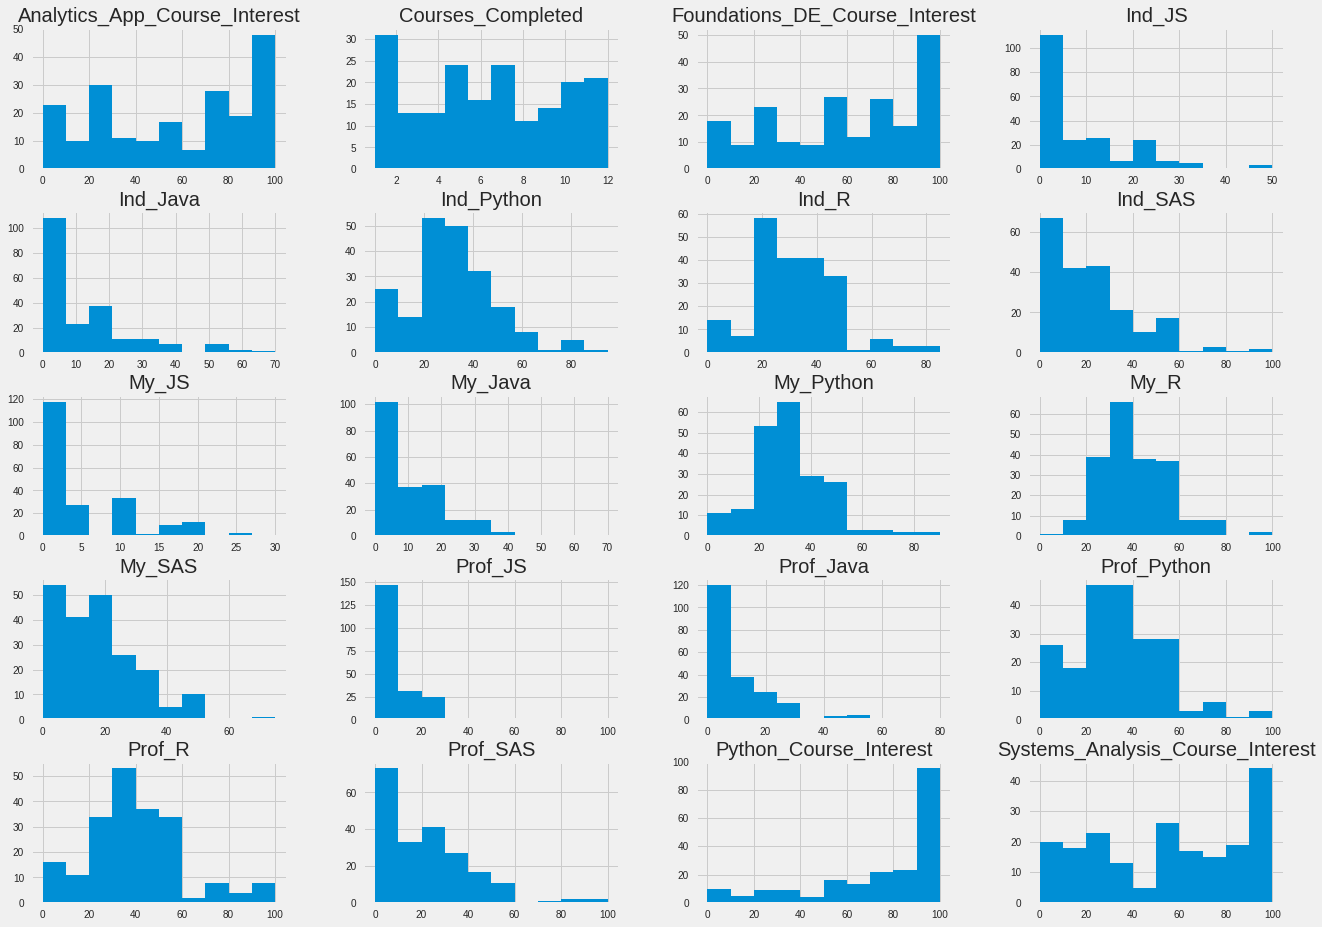

In [7]:
#@title
survey_df.hist(bins = 10,figsize=(20,15))
plt.savefig('histo.png')
plt.show()

### Research Design and Modeling

#### I focused on first ascertaining the software preferences of the students.   Let's look at boxplots displaying the software on the X-axis and the score of participants (0 to 100) for their personal preferences, their perceived demand for that software in their jobs (professional) and within their industry. 

In [0]:
#@title
SoftwareList = ['My_Java',
 'My_JS',
 'My_Python',
 'My_R',
 'My_SAS',
 'Prof_Java',
 'Prof_JS',
 'Prof_Python',
 'Prof_R',
 'Prof_SAS',
 'Ind_Java',
 'Ind_JS',
 'Ind_Python',
 'Ind_R',
 'Ind_SAS',]


Mysoft_df = survey_df[SoftwareList[0:5]]
Profsoft_df = survey_df[SoftwareList[5:10]]
Indsoft_df = survey_df[SoftwareList[10:15]]

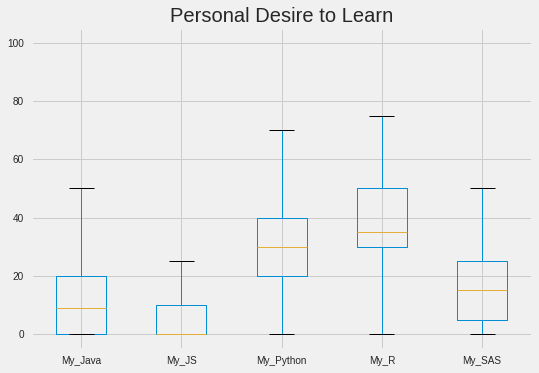

In [9]:
#@title
Mysoft_df.boxplot().set_title('Personal Desire to Learn')
plt.savefig('forreport1.png')

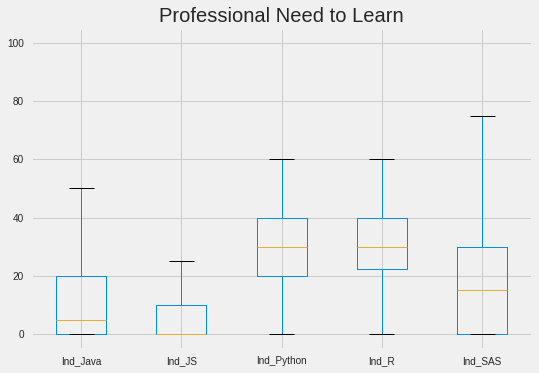

In [10]:
#@title
Indsoft_df.boxplot().set_title('Professional Need to Learn')
plt.savefig('forreport2.png')

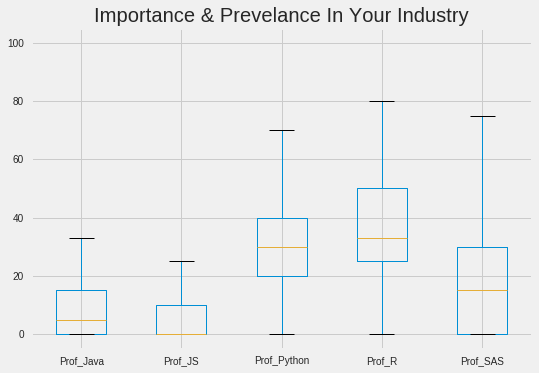

In [11]:
#@title
Profsoft_df.boxplot().set_title('Importance & Prevelance In Your Industry')
plt.savefig('forreport3.png')

#### We could clearly see that Python and R are the top languages for these data science students.   Additionally, a correlation matrix of survey items confirmed high correlation between students' preferred language and that which they saw as demanded in their jobs and industries.  

<Figure size 576x396 with 0 Axes>

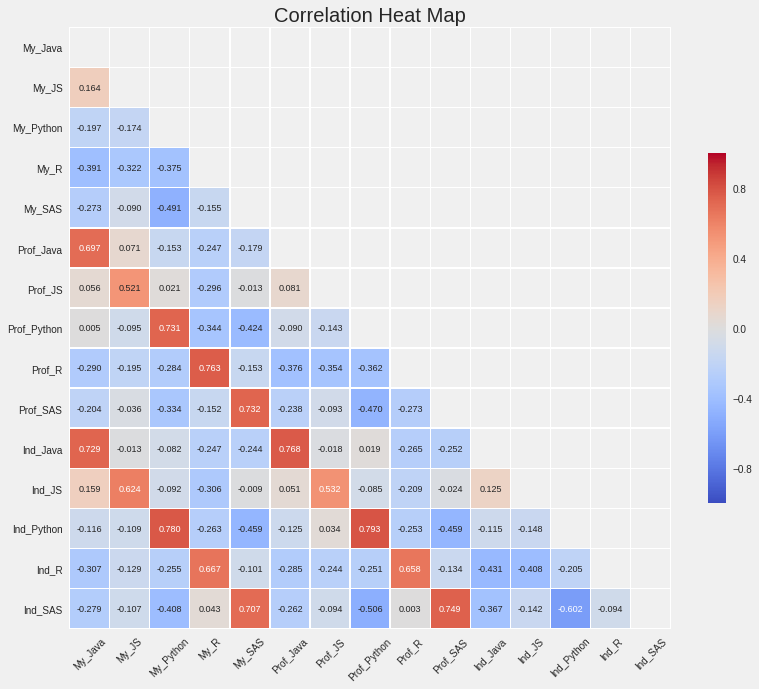

In [12]:
#@title

# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

##### One area where I focused was on the potential for any shift in preferences with graduation.  My hypothesis was that there was a potential shift in software preference over time.  The only way to see that in this data would be to compare preferences of those expecting to graduate sooner versus later.   

First I looked this using traditional metrics to convert grad dates by numerics (ie. soonest quarter = 1, latest  = 12)

In [0]:
#@title
GradDates = survey_df.dropna(axis = 0, subset=['Graduate_Date'])

In [14]:
#@title
GradDates.head()

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
RespondentID,,,,,,,,,,,,,,,,,,,,,
5133300037,10,10,50,30,0,25,25,30,20,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
5132253300,20,0,40,40,0,0,0,40,40,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
5132096630,10,10,25,35,20,10,10,25,35,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
5131990362,20,0,0,70,10,20,0,0,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018
5131860849,25,15,30,30,0,10,30,30,30,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018


In [0]:
#@title
survey_df['GradCopy'] = survey_df['Graduate_Date']

In [0]:
#@title
DateList = ['Spring 2018', 'Fall 2018', 'Fall 2017', 'Summer 2019',
       'Summer 2018', 'Winter 2019', '2020 or Later', 'Winter 2018',
       'Fall 2019', 'Fall 2016', 'Summer 2017', 'Spring 2019',
       'Spring 2017', 'Winter 2017', '2020 or Later']

In [0]:
#@title
DateDict =  {'Spring 2017':1,
'Summer 2017':2,
'Fall 2017':3,
'Winter 2018':4,
'Spring 2018':5,
'Summer 2018':6,
'Fall 2018':7,
'Winter 2019':8,
'Spring 2019':9,
'Summer 2019':10,
'Fall 2019' :11,
 '2020 or Later' : 12}

survey_df['GradCopy'] = survey_df['GradCopy'].map(DateDict)





I also prepared the data so that I could leverage SciKit Learn's Machine Learning methods.  

In [0]:
#@title
OE = OrdinalEncoder()
GradDates['Graduate_Date'] = OE.fit_transform(GradDates['Graduate_Date'].values.reshape(-1,1))

In [0]:
#@title
SoftwareList = ['My_Java',
 'My_JS',
 'My_Python',
 'My_R',
 'My_SAS',
 'Prof_Java',
 'Prof_JS',
 'Prof_Python',
 'Prof_R',
 'Prof_SAS',
 'Ind_Java',
 'Ind_JS',
 'Ind_Python',
 'Ind_R',
 'Ind_SAS',]


The following plots show the preferred software vs. SciKit Learn's Grad Date orindal.  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

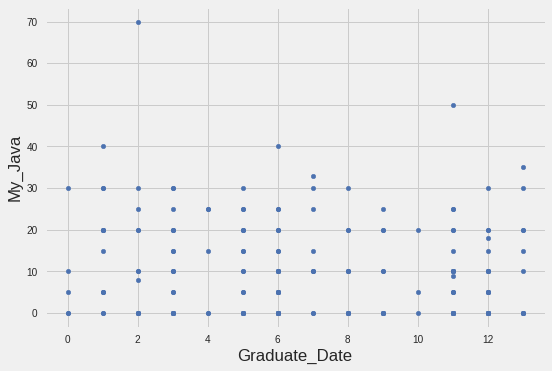

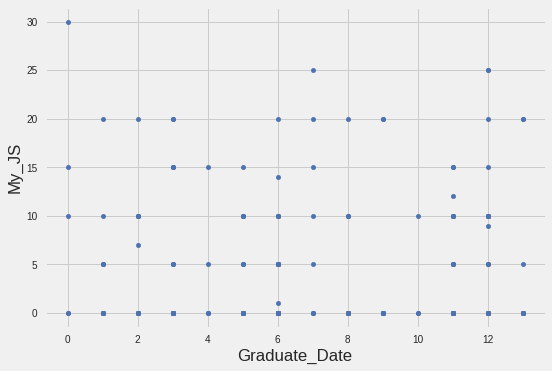

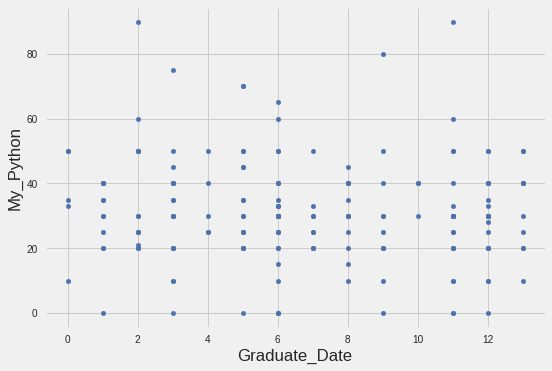

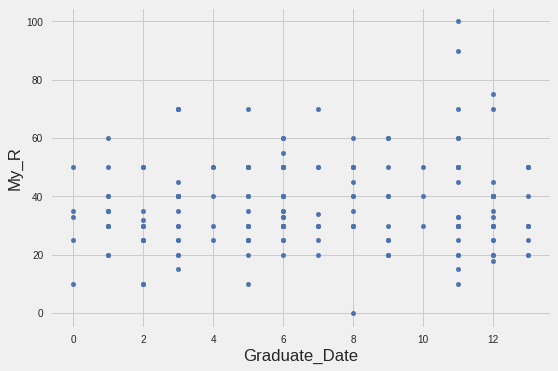

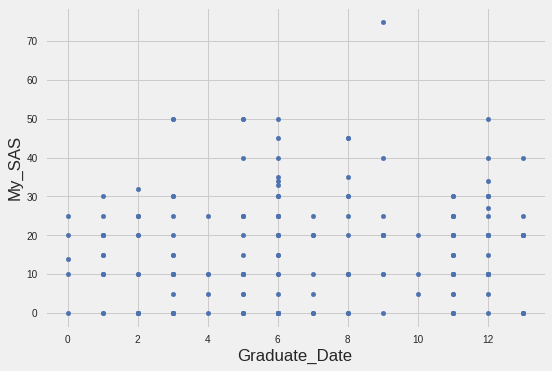

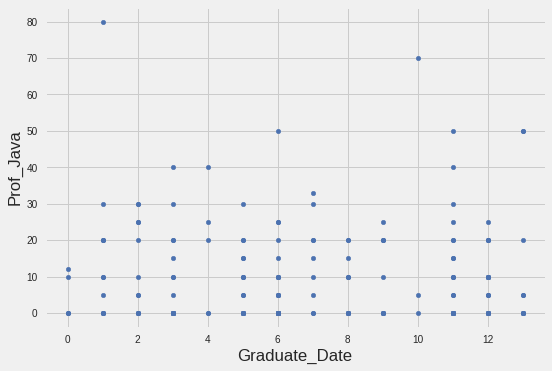

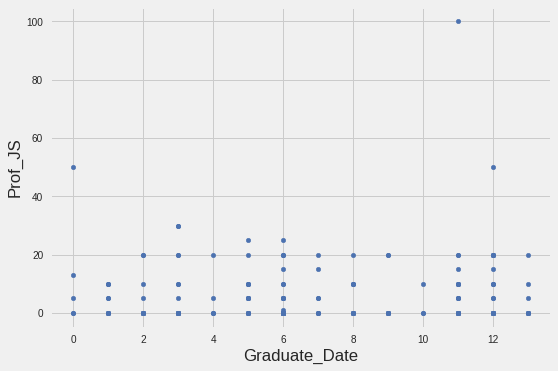

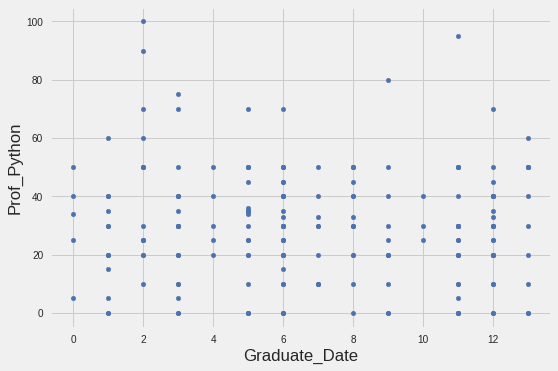

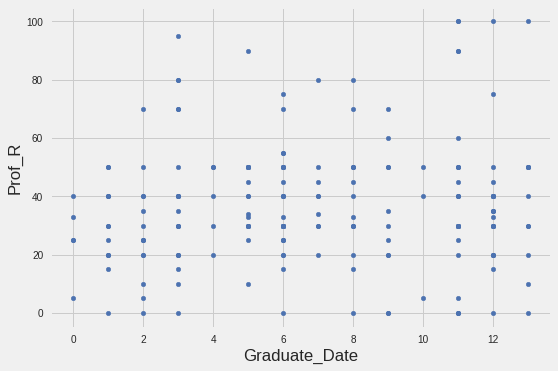

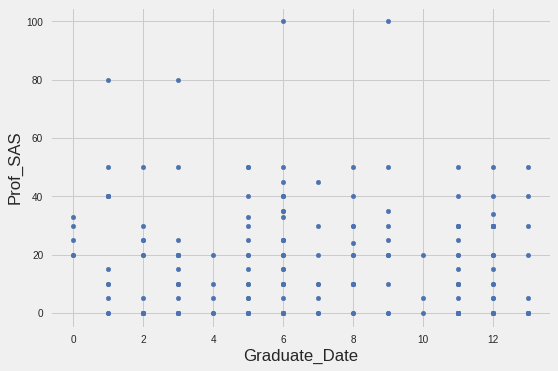

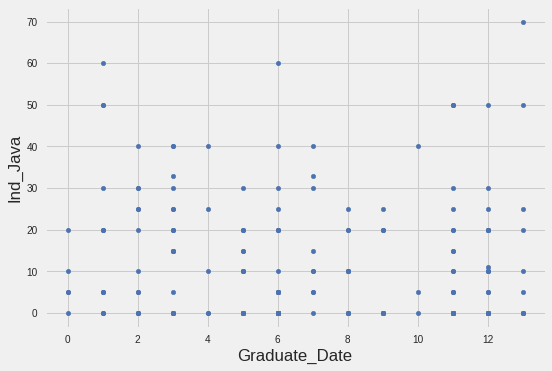

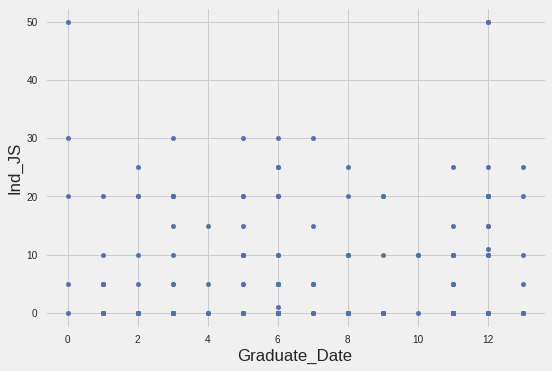

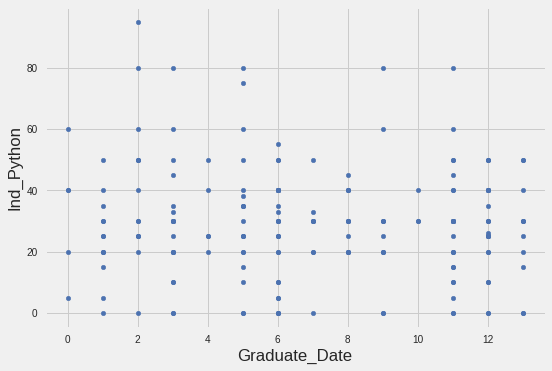

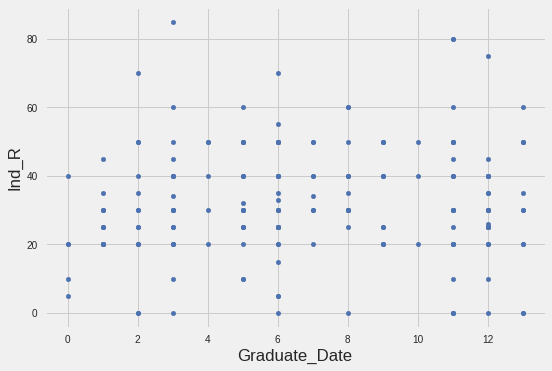

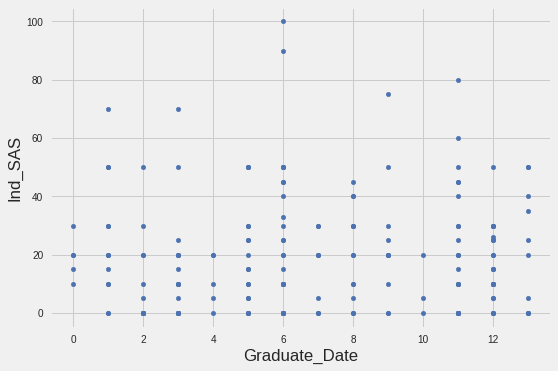

In [20]:
#@title
for i in SoftwareList :
    GradDates.plot.scatter(x= 'Graduate_Date', y = i)

These plots show the same thing in a more traditional manner using 1 as sooner graduation dates and 12 as later.  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

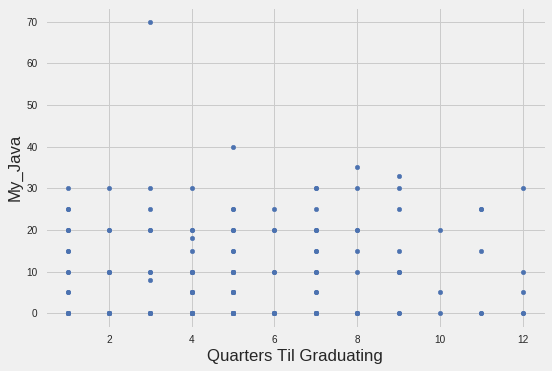

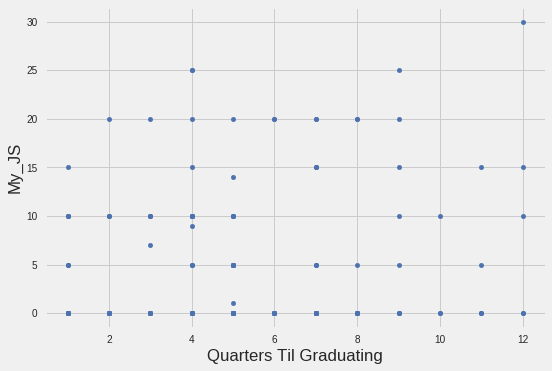

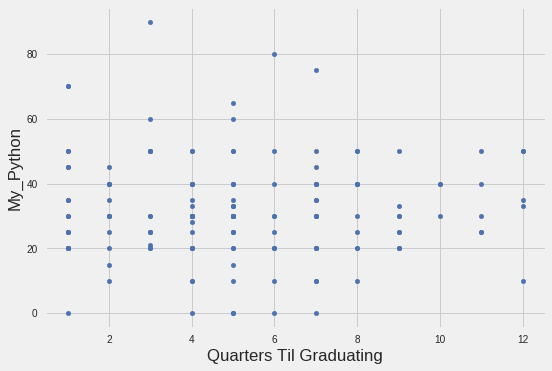

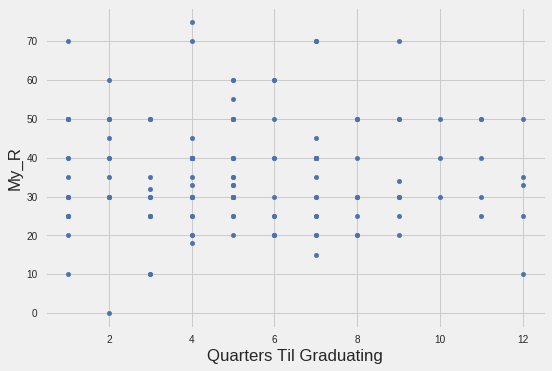

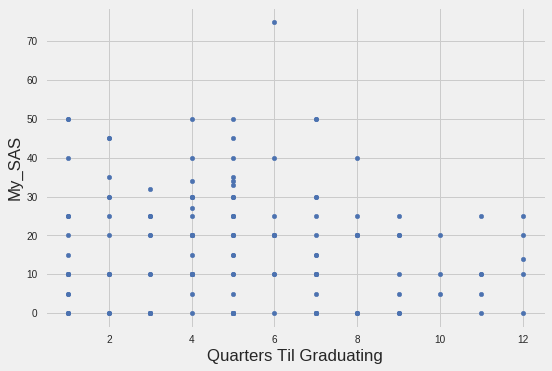

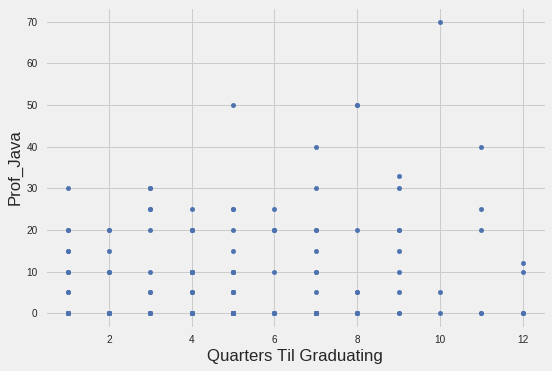

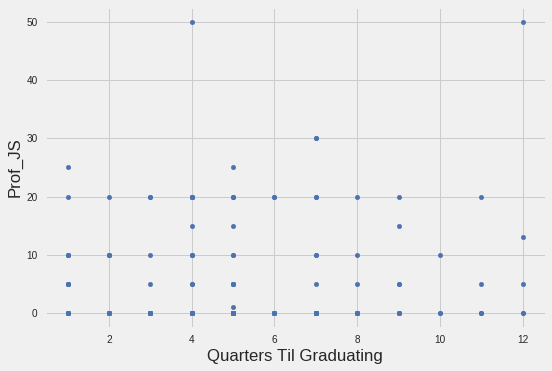

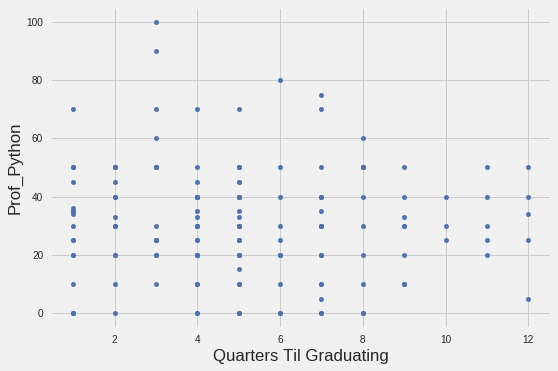

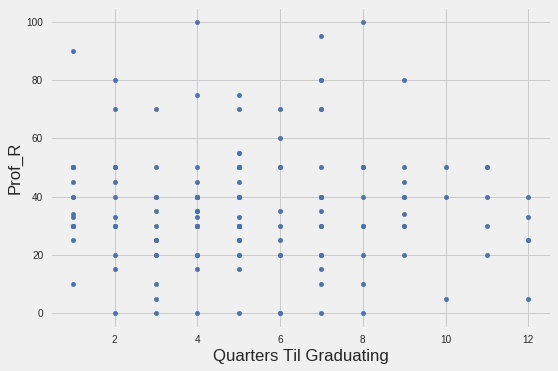

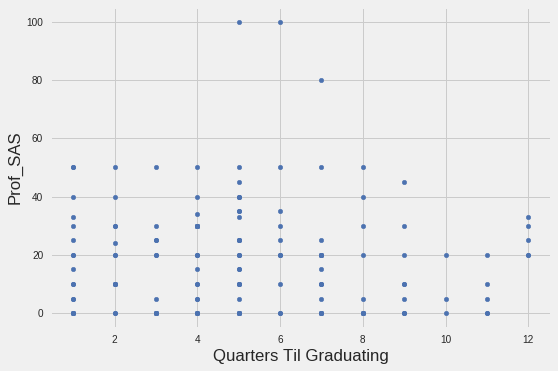

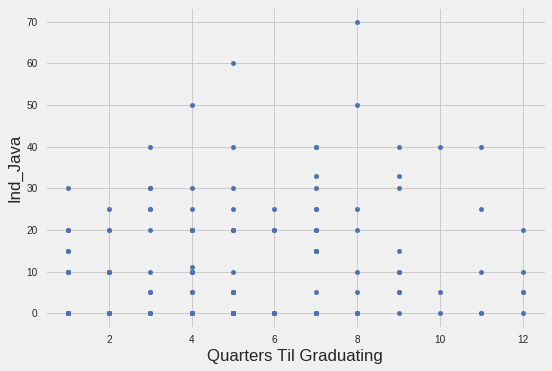

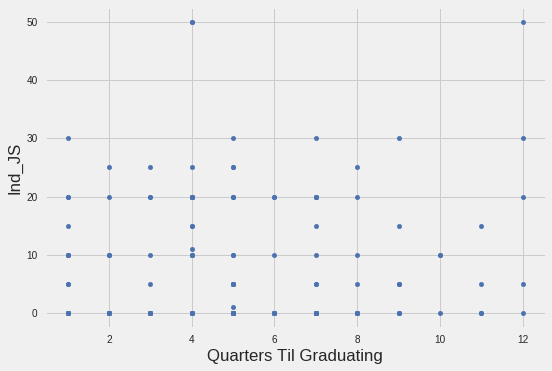

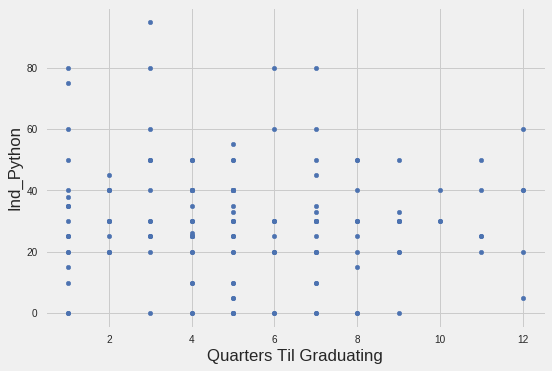

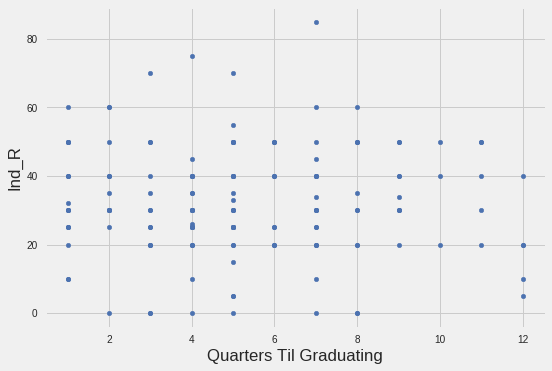

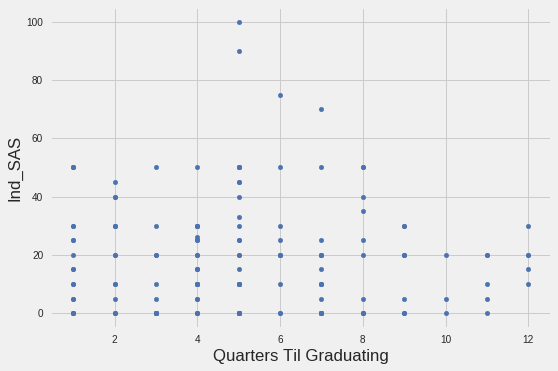

In [21]:
#@title
for i in SoftwareList :
    survey_df.plot.scatter(x = 'GradCopy', y= i).set_xlabel('Quarters Til Graduating')

#### Grouping by the number of courses a respondent had completed, I was surprised to see very little difference in the mean response. 

In [22]:
#@title
ByCourseTally = survey_df.groupby(['Courses_Completed']).mean()

ByCourseTally

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,GradCopy
Courses_Completed,,,,,,,,,,,,,,,,,,,,
1.0,7.500000,4.166667,30.833333,47.500000,10.000000,8.333333,4.166667,22.500000,48.333333,16.666667,14.666667,4.166667,28.000000,40.666667,12.500000,69.166667,63.666667,72.666667,58.800000,6.166667
2.0,8.920000,6.120000,32.040000,34.240000,18.680000,8.800000,7.000000,31.760000,32.320000,20.120000,10.400000,9.200000,29.000000,33.600000,17.800000,74.200000,72.083333,56.440000,50.200000,7.280000
3.0,11.923077,11.923077,29.615385,31.923077,14.615385,9.846154,8.076923,33.307692,36.461538,12.307692,14.846154,16.538462,31.000000,22.230769,15.384615,73.230769,62.615385,73.846154,73.666667,7.083333
4.0,6.923077,6.153846,38.076923,36.538462,12.307692,3.846154,5.384615,40.000000,32.692308,18.076923,8.461538,4.615385,36.153846,37.307692,13.461538,86.461538,56.846154,48.769231,56.923077,7.230769
5.0,13.041667,4.166667,29.625000,36.750000,16.416667,8.125000,5.625000,32.416667,38.250000,15.583333,12.750000,8.166667,30.458333,30.458333,18.166667,75.875000,49.391304,58.652174,52.304348,5.333333
6.0,9.062500,4.062500,35.062500,37.250000,14.562500,10.437500,5.500000,34.875000,35.187500,14.000000,16.250000,7.500000,33.750000,28.437500,14.062500,70.000000,53.812500,56.437500,53.866667,5.666667
7.0,8.125000,4.000000,25.958333,41.375000,20.541667,8.333333,5.666667,21.375000,42.208333,22.416667,9.375000,6.708333,22.208333,33.250000,28.458333,66.708333,47.857143,51.000000,54.409091,4.545455
8.0,7.727273,5.000000,38.181818,37.272727,11.818182,7.272727,2.727273,39.545455,36.363636,14.090909,11.363636,7.272727,34.545455,35.909091,10.909091,81.800000,44.100000,51.100000,40.300000,2.777778
9.0,11.785714,5.000000,33.214286,33.928571,16.071429,11.428571,6.785714,36.357143,30.928571,14.500000,11.428571,9.285714,33.571429,32.142857,13.571429,79.928571,70.785714,66.230769,54.285714,1.846154


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


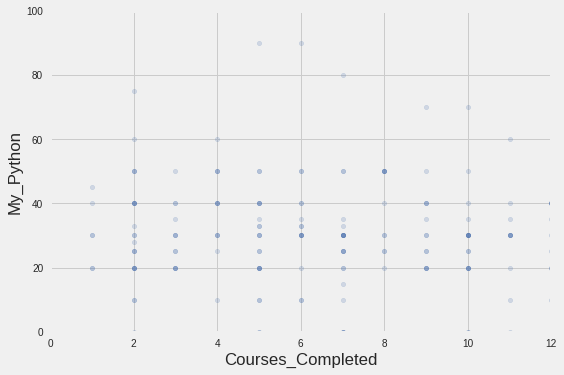

In [23]:
#@title
survey_df.plot(kind="scatter", x="Courses_Completed", y="My_Python",
             alpha=0.2)
plt.axis([0, 12, 0, 100])
plt.show()

##### That said, this could confirm what we saw in the overall software preference.    As students took more courses, there was a slight increase in the preference for R.   The laggard, Javascript, clearly fell over time

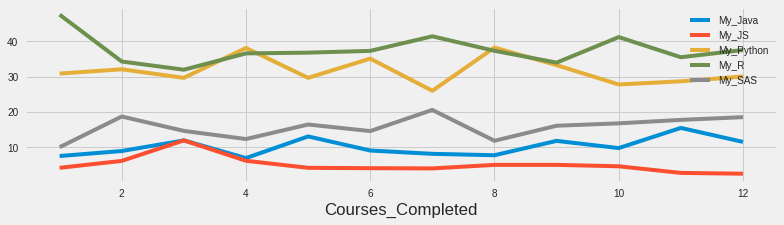

In [24]:
#@title
ByCourseTally.iloc[:,0:5].plot(kind="line", figsize = (12,3))
plt.savefig('coursecomplete.png')

##### There was very little difference in the  "Courses Complete" Data whether unscaled and or scaled using Sci-Kit Learn.  I conducted these tests to see if machine learning would be useful here and concluded that there was not enough data for machine learning techniques to add value. 

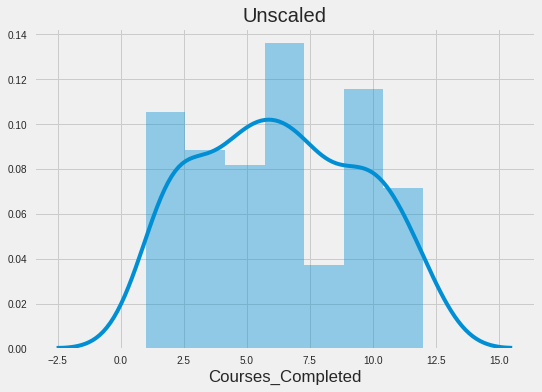

In [25]:
#@title
X = survey_df['Courses_Completed'].dropna()
unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.png', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  


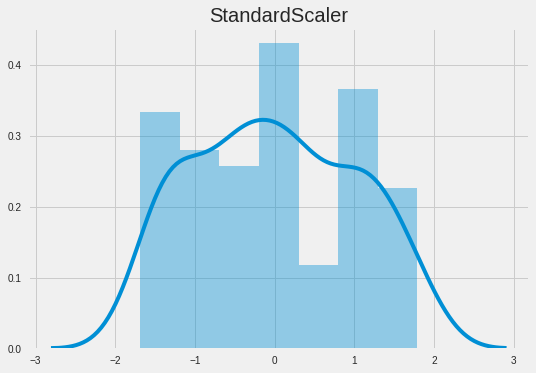

In [26]:
#@title
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X.values.reshape(-1,1))).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.png', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  


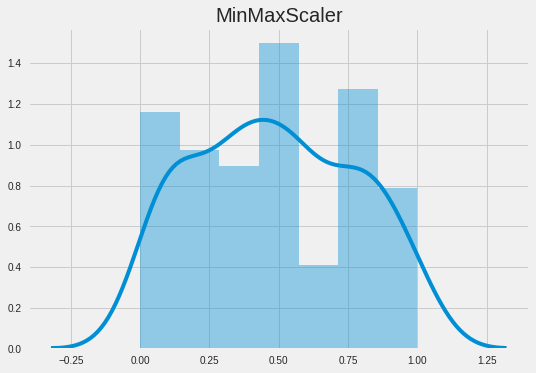

In [27]:
#@title

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1,1))).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.png', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

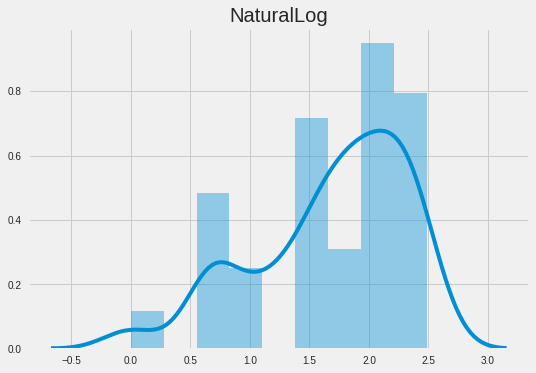

In [28]:
#@title
log_fig, ax = plt.subplots()
sns.distplot(np.log(X.values.reshape(-1,1))).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.png', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

#### Filtering by courses taken resulted in interesting distributions.  It appears that as student took courses beyond MSDS 422, especially applied analytics courses like 450 Marketing Analytics, and 456/7 Sports Analytics they had an increased preference for R.

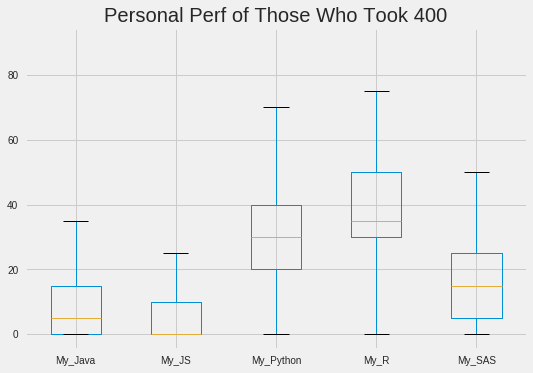

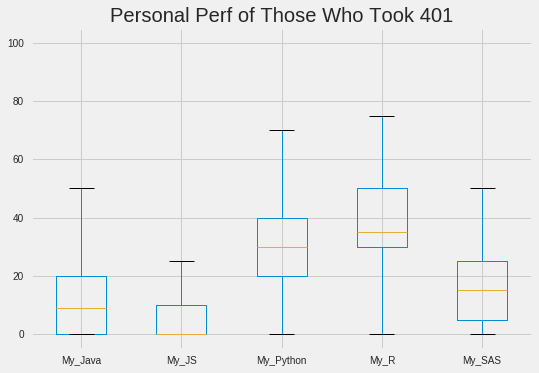

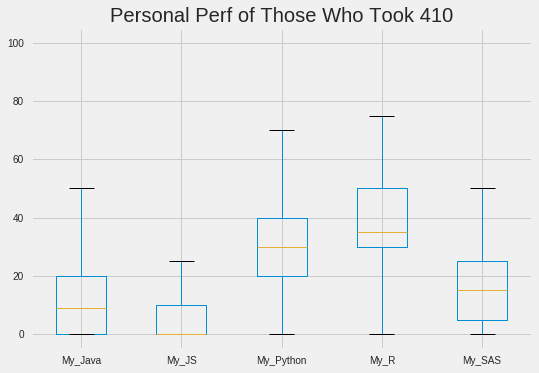

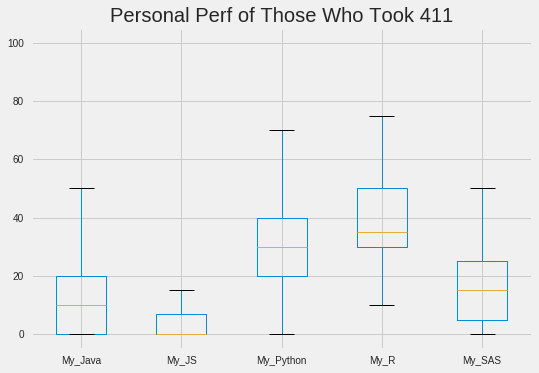

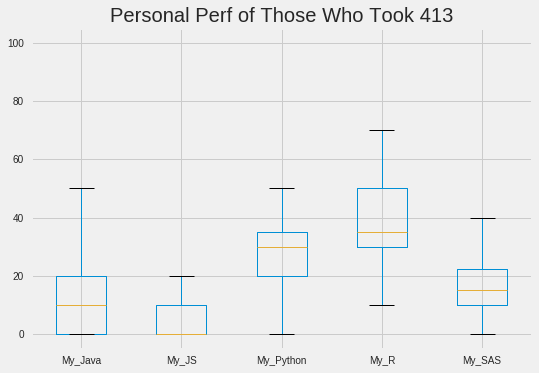

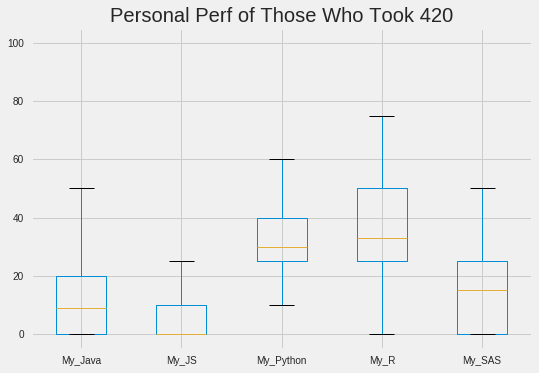

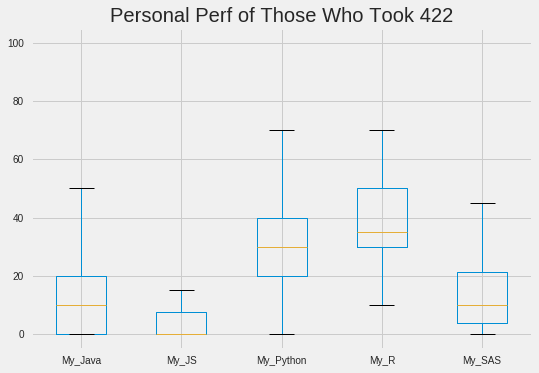

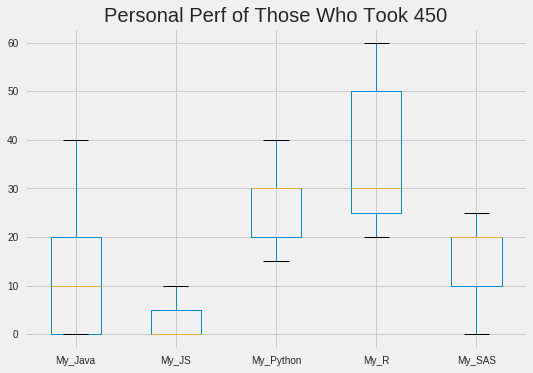

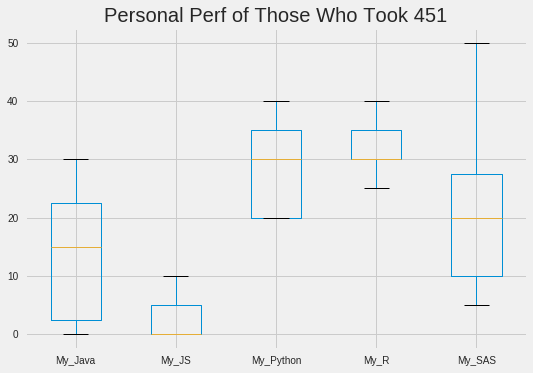

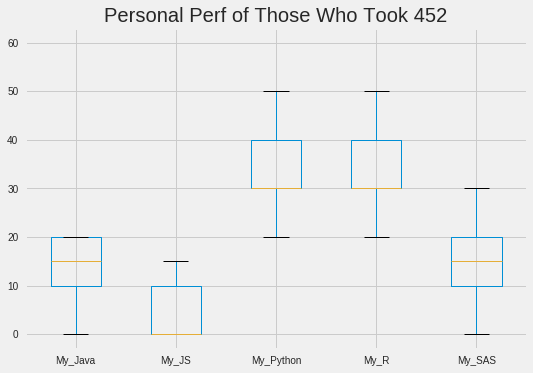

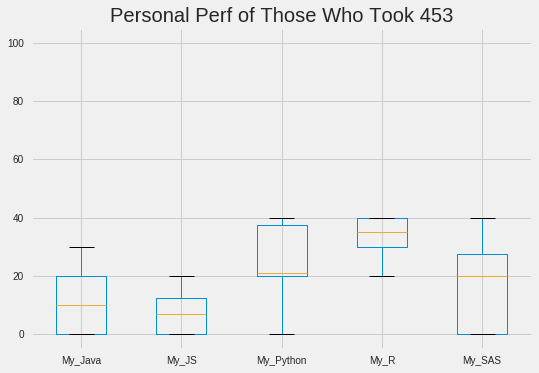

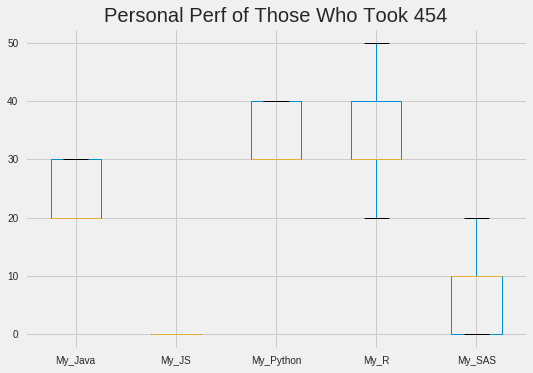

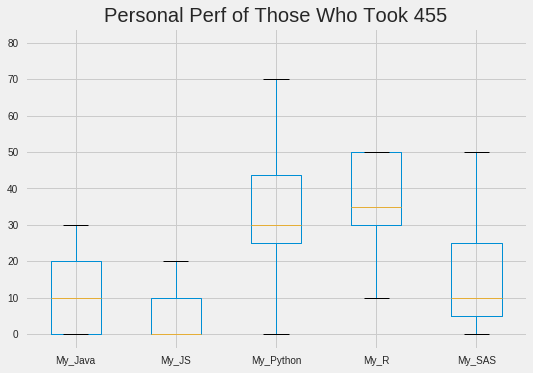

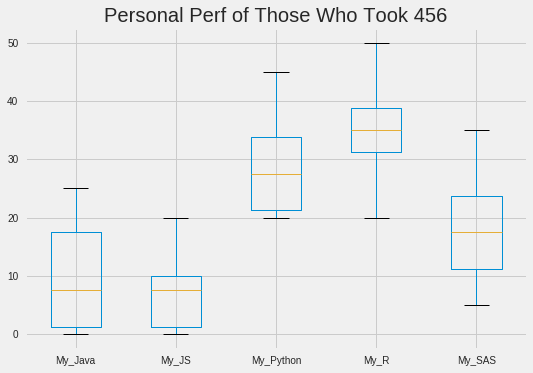

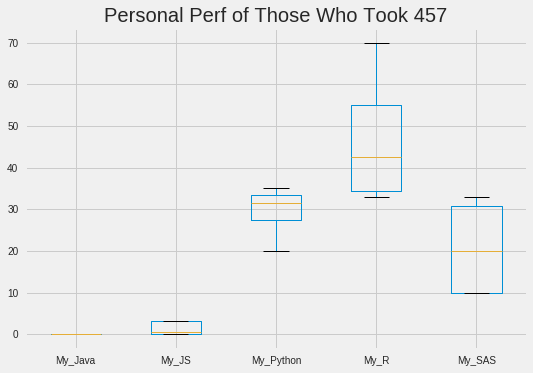

<Figure size 576x396 with 0 Axes>

In [29]:
#@title
CoursesTaken = ['PREDICT400',
 'PREDICT401',
 'PREDICT410',
 'PREDICT411',
 'PREDICT413',
 'PREDICT420',
 'PREDICT422',
 'PREDICT450',
 'PREDICT451',
 'PREDICT452',
 'PREDICT453',
 'PREDICT454',
 'PREDICT455',
 'PREDICT456',
 'PREDICT457']


for Course in CoursesTaken :
    tit = 'Personal Perf of Those Who Took ' + Course[7:]
    list = SoftwareList[0:5]
    list.append(Course)
    survey_df.dropna(subset = [Course])[list].boxplot().set_title(tit)
    plt.show()
    plt.savefig(tit)

**Conclusion & Management Recommendations: ** There are two major caveats to consider before offering any conclusions from this research.   These data are over two years old and focused on software trends that are changing very quickly.  There is very little in the data that would allow an analyst to assess trends over time.   That said, there is clear preference for Python and R among students.   There is not enough evidence to suggest much differentiation between R and Python, though it appears there might be a slight trend towards R as students take more advance applied analytics courses.  However, we should be cautious as this could simply be a correlation between preference and the languages used in the advanced classes.    